# Logistic Regression

## Import packages

In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt
%matplotlib inline

## Problem description

Given a dataset that contains cat and non-cat images, you need to build a simple image recognition algorithm that can classify pictures as a cat or non-cat.

## Data preprocessing

* Image labeled as cat (y = 1) or non-cat (y = 0)
* Training set and test set are of shape of (m, height, width, channel), where m is number of images, channel is 3 (RGB), height/width are number of pixel.


In [2]:
# Loading dataset
train_set_x, train_set_y, test_set_x, test_set_y, classes = utils.load_catvnoncat_dataset()

Info y = [1], it is a cat.


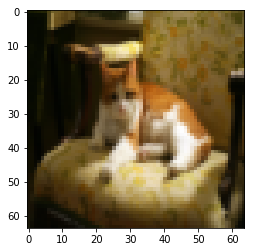

In [3]:
# Show a sample image
index = 7
plt.imshow(train_set_x[index])
print("Info y = {}, it is a {}."\
      .format(train_set_y[:, index], classes[np.squeeze(train_set_y[:, index])].decode("utf-8")))

In [4]:
num_train = train_set_x.shape[0]
num_test = test_set_x.shape[0]
num_px = train_set_x.shape[1]

print("Number of training samples: {}".format(num_train))
print("Number of test sample: {}".format(num_test))
print("Number of pixel (Height/Width): {}".format(num_px))
print("train_set_x.shape: {}".format(train_set_x.shape))
print("train_set_y.shape: {}".format(train_set_y.shape))
print("test_set_x.shape: {}".format(test_set_x.shape))
print("test_set_y.shape: {}".format(test_set_y.shape))

Number of training samples: 209
Number of test sample: 50
Number of pixel (Height/Width): 64
train_set_x.shape: (209, 64, 64, 3)
train_set_y.shape: (1, 209)
test_set_x.shape: (50, 64, 64, 3)
test_set_y.shape: (1, 50)


For convernience machine leanring:
* Flatting the training and test dataset shape form (m, height, width, channel) to (height * width * channel, m).
* Center and standardize dataset, substract the mean of the whole numpy array form each sample.

In [5]:
# Falt
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T

print("train_set_x_flatten.shape: {}".format(train_set_x_flatten.shape))
print("train_set_y.shape: {}".format(train_set_y.shape))
print("test_set_x_flatten.shape: {}".format(test_set_x_flatten.shape))
print("test_set_y.shape: {}".format(test_set_y.shape))

# Standardize
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

train_set_x_flatten.shape: (12288, 209)
train_set_y.shape: (1, 209)
test_set_x_flatten.shape: (12288, 50)
test_set_y.shape: (1, 50)


## Build Logistic Regression model

Logistic regression is a simple Neural Network, for one sample $ x^{(i)} $ :

$ z^{(i)} = w^T x^{(i)} + b $

$ \hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)}) $

$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)}) $

The cost function is:

$  J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)}) $

<b>Main steps:</b>

1. Initialize the parameters of the model.
2. Learn the parameters for minimizing the cost.
    * Forward propagation (calculate loss)
    * Backward propagation (calculate gradient)
    * Gradient descent (update paramenters)
3. User the learned parametner to predict on the test dataset.
4. Analyse the result.

### Activate function Sigmoid

$ sigmoid(z) = \frac{1}{1+e^{-(z)}} $

In [6]:
# Activate function
def sigmoid(z):
    """
    Arguments:
    z - A numpy array of any size.
    Returns:
    s - sigmoid(z)
    """
    s = 1.0 / (1 + np.exp(-z))
    return s

print("Sigmoid([0, 2]) = {}".format(sigmoid(np.array([0, 2]))))

Sigmoid([0, 2]) = [0.5        0.88079708]


### Initialize the parameters

Initialize the weight vector size and as a vector of zeros.

In [7]:
def initialize_paramenter(dim):
    """
    Arguments:
    dim - size of the weights
    
    Returns:
    W - initialized weight vecotr that shape is (dim, 1)
    b - initialized bias
    """
    W = np.zeros((dim, 1))
    b = 0
    return W, b

dim = 2
W, b = initialize_paramenter(dim)
print("W = {},\nW.shape = {}".format(W, W.shape))
print("b = {}".format(b))

W = [[0.]
 [0.]],
W.shape = (2, 1)
b = 0


### Forward and Backward propagation

Forward propagation

* Input train data: $ X $
* Compute the preidction: $ \hat{Y} = sigmoid(W^T X + b) = (a^{(0)}, a^{(1)}, a^{(2)}, ..., a^{(m)}) $
* Compute the cost: $ J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}) $

Backward propagation

* Comput gradient of loss weights (dW): $ \frac{\partial{J}}{\partial{w}} = \frac{1}{m}X (\hat{Y}-Y)^T $
* Comput gradient of loss bias (db): $ \frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m (a^{(i)}-y^{(i)}) $
 

In [8]:
def propagate(W, b, X, Y):
    """
    Argumanets:
    W - weights, shape (D, 1)
    b - bias
    X - training data samples, shape (D ,M)
    Y - training data labels, shape (1, M)
    
    Returns:
    cost - negative cost for logistic regression
    grads - dictionary containing the gradient of loss weights and bias
    """
    m = X.shape[1]
    
    # Forward
    Y_hat = sigmoid(np.dot(W.T, X) + b) # shape (1, M)
    cost = -np.sum((Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))) / m
    
    # Backward
    dW = np.dot(X, (Y_hat - Y).T) / m # shape (D, 1)
    db = np.sum(Y_hat - Y) / m
    cost = np.squeeze(cost)
    
    grads = {"dW": dW, "db": db}
    return grads, cost



W = np.array([[1.], [2.]]) # shape (2, 1)
b = 2
X = np.array([[1., 2., -1.], [3., 4., -3.2]]) # shape (3, 2)
Y = np.array([[1, 0, 1]]) # shape (1, 2)

grads, cost = propagate(W, b, X, Y)
print("dW = {}".format(grads["dW"]))
print("db = {}".format(grads["db"]))
print("cost = {}".format(cost))

dW = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


### Optimization

Using gradient desent to update paramenters.

$ \theta = \theta - \alpha \text{ } d\theta $, where $ \theta $ is parameters (weights and bias), $ \alpha $ is learning rate.

In [9]:
def optimize(W, b, X, Y, num_iterations, learning_rate, verbose=False):
    """
    Arguments:
    W - weights, shape (D, 1)
    b - biase
    X - training data samples, shape (D ,M)
    Y - training data labels, shape (1, M)    
    num_iterations - number of the optimization loop
    learning_rate - gradient desent updates step
    verbose - print the loss log
    
    Returns:
    params - dictionary containing the wieghts and bias
    grads - dictionary containing the gradient of loss weights and bias
    costs - list of all the costs
    """
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(W, b, X, Y)
        
        dW = grads["dW"]
        db = grads["db"]
        
        # update weights and bias
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if verbose and i % 100 == 0:
            print("Iteration[{}] - cost: {}".format(i, cost))
        
    params = {"W": W, "b": b}
    grads = {"dW": dW, "db": db}
    return params, grads, costs


params, grads, costs = optimize(W, b, X, Y, 100, 0.009)
print("W = {}".format(params["W"]))
print("b = {}".format(params["b"]))
print("dW = {}".format(grads["dW"]))
print("db = {}".format(grads["db"]))

W = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dW = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


### Prediction

Calculate $ \hat{Y} = sigmoid(W^T X + b) $

In [10]:
def predict(W, b, X):
    """
    Arguments:
    W - weights, shape (D, 1)
    b - biase
    X - test data samples, shape (D ,M)
    
    Returns:
    predicted_Y - all predictions for the test samples in X
    """
    
    m = X.shape[1]
    predicted_Y = np.zeros((1, m))
        
    Y_hat = sigmoid(np.dot(W.T, X) + b)
    
    for i in range(Y_hat.shape[1]):
        if Y_hat[0, i] <= 0.5:
            predicted_Y[0, i] = 0
        else:
            predicted_Y[0, i] = 1
    
    return predicted_Y


print("Predections = {}".format(predict(W, b, X)))

Predections = [[1. 1. 0.]]


### Combin all functions into a model

In [11]:
def print_accuracy(set_type, Y, predicted_Y):
        print("{} accuracy: {}".format(set_type, 100 - np.mean(np.abs(predicted_Y -Y)) * 100))      

In [12]:
def run_model(train_X, train_Y, test_X, test_Y, num_iterations=1000, learning_rate=0.3, verbose=False):
    W, b = initialize_paramenter(train_X.shape[0])
    
    params, grads, costs = optimize(W, b, train_X, train_Y, num_iterations, learning_rate, verbose)
    
    W = params["W"]
    b = params["b"]

    predicted_train_Y = predict(W, b, train_X)
    predicted_test_Y = predict(W, b, test_X)
    
    print_accuracy("Train", train_Y, predicted_train_Y)
    print_accuracy("Test", test_Y, predicted_test_Y)
    
    model = {
        "costs": costs,
        "predicted_train_Y": predicted_train_Y,
        "predicted_test_Y": predicted_test_Y,
        "W": W,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    return model

In [13]:
model = run_model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005)

Train accuracy: 99.04306220095694
Test accuracy: 70.0


Y = 1, Predicted Y = cat


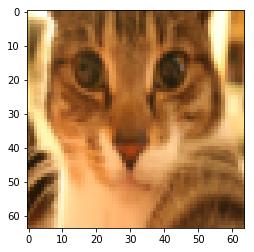

In [14]:
index = 3
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print("Y = {}, Predicted Y = {}".format(test_set_y[0, index], classes[int(model["predicted_test_Y"][0, index])].decode("utf-8")))

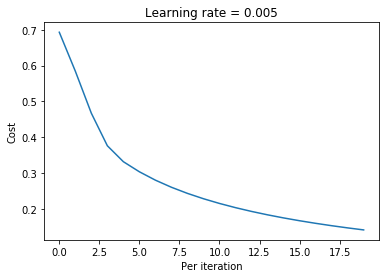

In [15]:
costs = np.squeeze(model["costs"])
plt.title("Learning rate = {}".format(model["learning_rate"]))
plt.ylabel("Cost")
plt.xlabel("Per iteration")
plt.plot(costs)
plt.show()

## Analysis

In [19]:
base_learning_rates = [0.3, 0.1]
decay_rates = [1., 0.1, 0.01]

models = {}
for blr in base_learning_rates:
    for decay in decay_rates:
        lr = blr * decay
        print("Learning rate = {}".format(lr))
        models[str(lr)] = run_model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=lr)
        print("---------------------------------------------")

Learning rate = 0.3


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


Train accuracy: 100.0
Test accuracy: 74.0
---------------------------------------------
Learning rate = 0.03
Train accuracy: 100.0
Test accuracy: 68.0
---------------------------------------------
Learning rate = 0.003
Train accuracy: 97.12918660287082
Test accuracy: 70.0
---------------------------------------------
Learning rate = 0.1
Train accuracy: 100.0
Test accuracy: 68.0
---------------------------------------------
Learning rate = 0.010000000000000002
Train accuracy: 99.52153110047847
Test accuracy: 70.0
---------------------------------------------
Learning rate = 0.001
Train accuracy: 91.38755980861244
Test accuracy: 68.0
---------------------------------------------


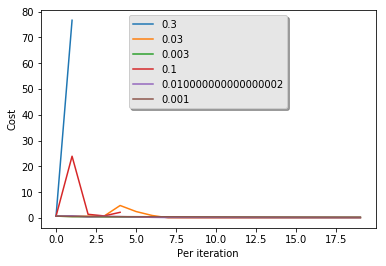

In [21]:
for blr in base_learning_rates:
    for decay in decay_rates:
        lr = blr * decay
        plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))
        
plt.ylabel("Cost")
plt.xlabel("Per iteration")
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()